In [ ]:
#RandomForestClassification, accuracy report, confusion matrix, compute feature importance (MDI & permutation), 

#This is the code for classifying vowels in Punjabi language. But the code can be modified to classify 
#similar data.
#
#The dataset consists of only oral vowels as nasal/nasalized vowels were not included in the current analysis.
#
#Variables: Speaker (9 males), raw F0 (Hz), bark normalized first three formants, and vowel duration normalized by word
#duration

#Load main libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import data

In [7]:
punjabi = pd.read_csv("punOralNorm.csv")
punjabi.head()

,speaker,vowel,F0,f1bark,f2bark,f3bark,durZ
0,1,ə,132.0,3.766033,11.954046,14.463584,0.652319
1,1,ɪ,131.0,3.323425,12.670158,14.407519,1.563838
2,1,ɪ,147.0,4.070533,13.139815,14.940423,2.856070
3,1,ə,151.0,4.601947,9.453999,14.492741,1.679061
4,1,ə,141.0,4.348614,9.713922,14.307432,0.138925


#check variables look ok, check data shape

In [9]:
punjabi.dtypes

speaker      int64
vowel       object
F0         float64
f1bark     float64
f2bark     float64
f3bark     float64
durZ       float64
dtype: object

In [10]:
print(punjabi.shape)

(3175, 7)


#remove missing data points

In [12]:
punjabiMissingDropped = punjabi.dropna()
print(punjabiMissingDropped.shape)

(3118, 7)


In [ ]:
#After initial tests on modeling, I decided to remove the rounded back vowel as it has only 33 occurrences.
#But don't remove data points randomly just to improve model metrics. My decision is based on a separate analysis
#not shown here.

In [13]:
index_names = punjabiMissingDropped[ punjabiMissingDropped['vowel'] == "ɔ" ].index
  
# drop these row indexes from dataFrame
punjabiEx = punjabiMissingDropped.drop(index_names, inplace = False)
  
punjabiEx

,speaker,vowel,F0,f1bark,f2bark,f3bark,durZ
0,1,ə,132.0,3.766033,11.954046,14.463584,0.652319
1,1,ɪ,131.0,3.323425,12.670158,14.407519,1.563838
2,1,ɪ,147.0,4.070533,13.139815,14.940423,2.856070
3,1,ə,151.0,4.601947,9.453999,14.492741,1.679061
4,1,ə,141.0,4.348614,9.713922,14.307432,0.138925
...,...,...,...,...,...,...,...
3168,9,e,138.0,4.321120,11.768097,13.494696,-0.299687
3169,9,ɛ,136.0,6.162236,11.053225,13.522632,0.285550
3171,9,a,142.0,5.411215,10.654784,13.388047,-0.362662
3172,9,o,141.0,4.238221,7.059956,13.825011,0.436843


In [14]:
punjabiEx["vowel"].shape
#removed 30 ɔ. The remaining 3 were lost with nas.

(3088,)

#create feature matrix to predict labels (vowel). x has all the columns except vowel.

In [16]:
x = punjabiMissingDropped.drop("vowel", axis = 1)
x.head()

,speaker,F0,f1bark,f2bark,f3bark,durZ
0,1,132.0,3.766033,11.954046,14.463584,0.652319
1,1,131.0,3.323425,12.670158,14.407519,1.563838
2,1,147.0,4.070533,13.139815,14.940423,2.856070
3,1,151.0,4.601947,9.453999,14.492741,1.679061
4,1,141.0,4.348614,9.713922,14.307432,0.138925


#create labels: vowel in this case. 

In [18]:
y = punjabiMissingDropped["vowel"]
y.head()

0    ə
1    ɪ
2    ɪ
3    ə
4    ə
Name: vowel, dtype: object

#import classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

#divide feature matrix(x) and labels(y) datasets into train and test data. 70% in train and 30% in test.  

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=0)

In [21]:
xtrain.shape

(2182, 6)

In [22]:
ytrain.shape

(2182,)

#train the model

In [23]:
feature_names = [f"feature {i}" for i in range(x.shape[1])]

clf.fit(xtrain, ytrain);

In [26]:
yPreds = clf.predict(xtest)
yPreds;

#check accuracy score for classification

In [27]:
clf.score(xtest, ytest)

0.6965811965811965

#check other metrics

In [33]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

f1 = f1_score(ytest, yPreds, average='weighted')
print('F1: %.3f' % f1)

precision = precision_score(ytest, yPreds, average='weighted', zero_division=1)#Caution: had to use zero_division as there are problems with model predictions. Should check.  
print('Precision: %.3f' % precision)

recall = recall_score(ytest, yPreds, average='weighted')
print('Recall: %.3f' % recall)


F1: 0.677
Precision: 0.690
Recall: 0.697


#may also generate a classification report

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, yPreds, zero_division=1))
#ten fold cross validation

              precision    recall  f1-score   support

           a       0.80      0.90      0.85       252
           e       0.72      0.86      0.78       188
           i       0.61      0.70      0.65        63
           o       0.64      0.87      0.74        67
           u       0.72      0.65      0.68        43
           ɔ       1.00      0.00      0.00        12
           ə       0.50      0.43      0.46       107
           ɛ       0.64      0.66      0.65        35
           ɪ       0.69      0.44      0.54       128
           ʊ       0.50      0.22      0.31        41

    accuracy                           0.70       936
   macro avg       0.68      0.57      0.57       936
weighted avg       0.69      0.70      0.68       936



#print confusion matrix

In [39]:
print(confusion_matrix(ytest, yPreds))

[[226   4   0   0   0   0  14   5   2   1]
 [  2 162   5   1   0   0   7   4   7   0]
 [  0   7  44   0   0   0   0   0  12   0]
 [  0   0   0  58   4   0   2   0   0   3]
 [  1   2   0   9  28   0   2   0   0   1]
 [  6   0   0   5   0   0   1   0   0   0]
 [ 37  10   0   2   1   0  46   3   4   4]
 [  7   3   0   0   0   0   2  23   0   0]
 [  1  38  23   0   0   0   9   1  56   0]
 [  2   0   0  15   6   0   9   0   0   9]]


#another way to visualize confusion matrix using seaborn heatmap

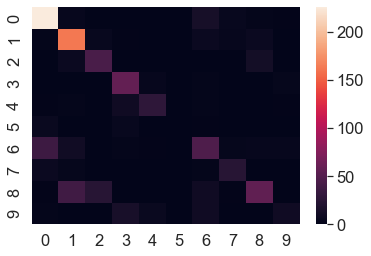

In [40]:
import seaborn as sns

#set the font scale
sns.set(font_scale = 1.5)
cnf_mat = confusion_matrix(ytest, yPreds)

sns.heatmap(cnf_mat);

#create a function to plot a customized confusion matrix

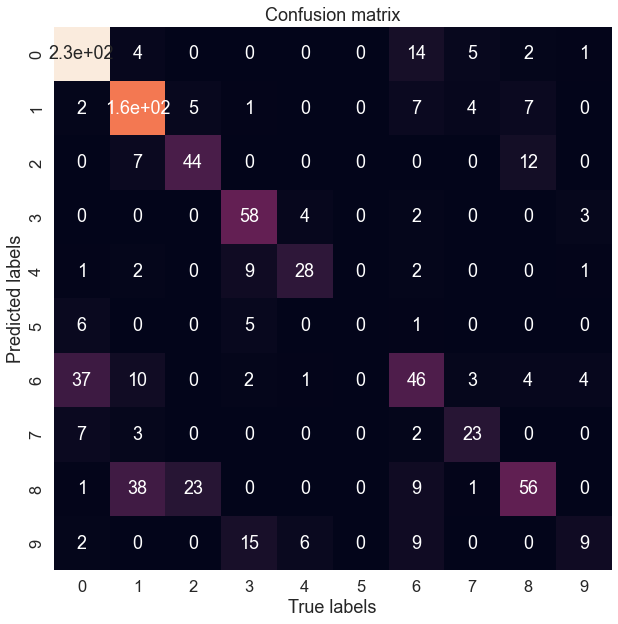

In [43]:
def plot_conf_mat(conf_mat):
    """
    Plotting a customized confusion matrix.
    """
    fig, ax = plt.subplots(figsize = (10, 10))
    ax = sns.heatmap(cnf_mat,
                    annot = True,
                    cbar = False)
    
    #customize
    plt.xlabel("True labels")
    plt.ylabel("Predicted labels")
    plt.title("Confusion matrix")
    
    #can use the code below to adjust ylim if figure is cropped  
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)


plot_conf_mat(cnf_mat);


#yet another way to plot confusion matrix

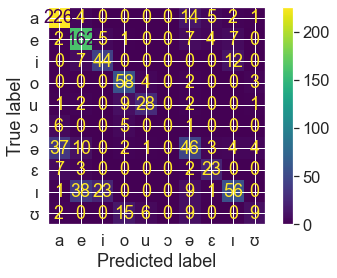

In [55]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

plotCnf = confusion_matrix(ytest, yPreds);

disp = ConfusionMatrixDisplay(confusion_matrix = plotCnf,
                             display_labels = clf.classes_);
disp.plot()
#may use the code below to sav the figure as PNG image
#fig.savefig("images/disp.png");

# feature importance based on mean decrease in impurity (MDI)
#which features contributed the most to correct classification

In [56]:
#print how long it took to compute importances
import time

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.017 seconds


#plot impurity based importance

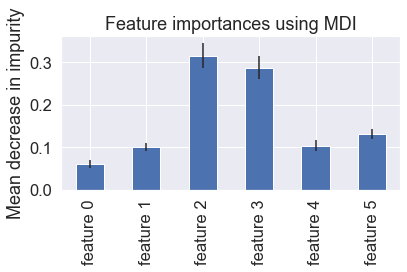

In [57]:
import pandas as pd

clf_importances = pd.Series(importances, index = feature_names)

fig, ax = plt.subplots()
clf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
#order of features:
#speaker  	F0 	f1bark 	f2bark 	f3bark 	durz
#First two formants play the most important role, followed by normalized duration

# feature importance based on feature permutation

#compute elapsed time

In [59]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    clf, xtest, ytest, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

clf_importances = pd.Series(result.importances_mean, index=feature_names)


Elapsed time to compute the importances: 1.433 seconds


#plot feature importance

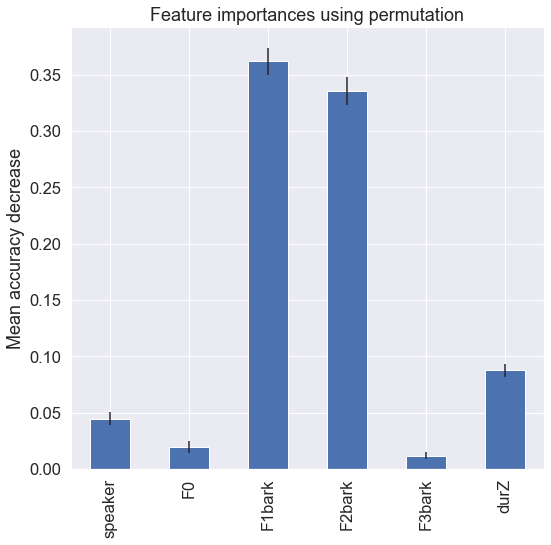

In [60]:
bars = ("speaker", "F0", "F1bark", "F2bark", "F3bark", "durZ")
x_pos = np.arange(len(bars))


fig, ax = plt.subplots(figsize = (8, 8))

clf_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
# Create names on the x axis
plt.xticks(x_pos, bars)
plt.show();

#similar hierarchy of features as the one generated by MDI based importance above